In [1]:
import time
import numpy as np
from scipy import signal
from itertools import product
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [2]:
# Define functions
# Gaussian
def fct_Gauss(x,esp,var):
    return ((1./np.sqrt(var*2*np.pi))*np.exp(-0.5*(x-esp)**2/var))
# Gaussian - lambda dependant
def fct_Gauss_bis()
# Delta
def delta(n):
    if n == 0:
        return 1
    else:
         return 0
# Convolution
def convolution(a,b):
    conv = []
    for i in range(len(a)):
        somme = 0                # 
        for j in range(len(b)):  #
            somme += a[i-j]*b[j] #
        conv.append(somme)
    return conv

Amplitude: [1 1 1 1 1 1 1 1 1 1]
Distance: [ 0 10 20 30 40 50 60 70 80 90]


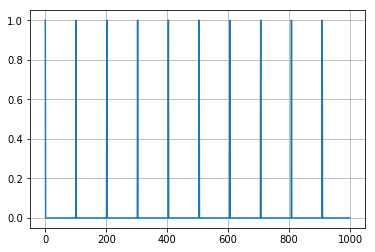

In [3]:
fi = []
n = 100
n_pic = 10

amp = np.ones(n_pic,dtype=int)
dis = np.arange(0,n,n_pic)

for i,j in product(range(n),range(n_pic)):
    fi.append(amp[j]*delta(i-dis[j]))

print('Amplitude:', amp)
print('Distance:', dis)

plt.figure()
plt.plot(fi)
plt.grid(True)

module: 0.004422903060913086
homemade: 6.281756401062012


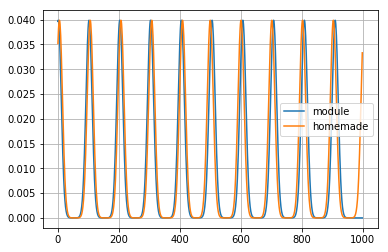

In [20]:
sigma = 100
esperance = len(fi)/2
x = np.arange(0,len(fi),1)
# convolve by using module
start = time. time()
fo_module = np.convolve(fi, fct_Gauss(x,esperance,sigma),mode='same')  
end = time. time()
print('module:',end - start)
# convolve by using self defined function
start = time. time()
fo_hm = convolution(fi, fct_Gauss(x,esperance,sigma))
end = time. time()
print('homemade:',end - start)

plt.figure()
plt.plot(fo_module,label='module')
plt.plot(fo_hm,label='homemade')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
result_fi = integrate.trapz(fi)
result_fo1 = integrate.trapz(fo_module)
result_fo2 = integrate.trapz(fo_hm)
print(result_fi)
print (result_fo1)
print (result_fo2)

9.5
9.474328142488698
9.989710121068194


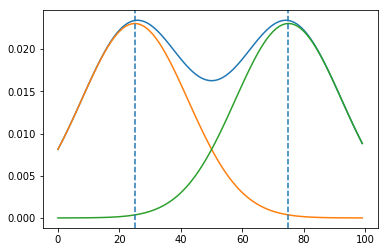

In [72]:
# critère de Rayleigh ￼1.22λ/D 
# FWHM = 2.355*sigma
# sigma = 0.44 λ/D 
# put 2 gaussians one next the other
x = np.arange(0,100,1)
sigma = 300
esp1 = 25
esp2 = 75
y1 = fct_Gauss(x,esp1,sigma)
y2 = fct_Gauss(x,esp2,sigma)
y = y1 + y2
plt.figure()
plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.axvline(x=signal.find_peaks(y1)[0],ls='--')
plt.axvline(x=signal.find_peaks(y2)[0],ls='--')
plt.show()

In [83]:
# Contraste = (I_max - I_min)/(I_max + I_min)
contraste = (y[25] - y[signal.argrelmin(y)]) / (y[25] + y[signal.argrelmin(y)])
print (contraste)
# Contraste simplifiée = I_min
contraste_simple = y[signal.argrelmin(y)]/np.max(y)
print (contraste_simple)

[0.17997049]
[0.69419474]


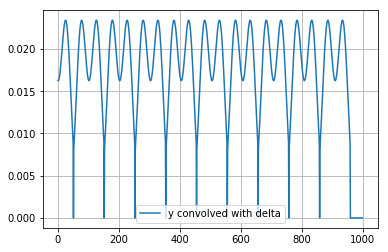

In [79]:
y_conv = np.convolve(fi, y, mode='same')  
plt.figure()
plt.plot(y_conv,label='y convolved with delta')
plt.legend()
plt.grid(True)
plt.show()

In [84]:
contraste_simple_yconv = y_conv[signal.argrelmin(y_conv)]/np.max(y_conv)
print (contraste_simple_yconv)

[0.69419474 0.         0.69419474 0.         0.69419474 0.
 0.69419474 0.         0.69419474 0.         0.69419474 0.
 0.69419474 0.         0.69419474 0.         0.69419474 0.
 0.69419474]
